In [5]:
! pip install kaggle

In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download -d landlord/handwriting-recognition

100% 1.25G/1.26G [00:11<00:00, 149MB/s]
100% 1.26G/1.26G [00:11<00:00, 117MB/s]


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import tensorflow as tf
import string
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [15]:
! unzip handwriting-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: validation_v2/validation/VALIDATION_5003.jpg  
  inflating: validation_v2/validation/VALIDATION_5004.jpg  
  inflating: validation_v2/validation/VALIDATION_5005.jpg  
  inflating: validation_v2/validation/VALIDATION_5006.jpg  
  inflating: validation_v2/validation/VALIDATION_5007.jpg  
  inflating: validation_v2/validation/VALIDATION_5008.jpg  
  inflating: validation_v2/validation/VALIDATION_5009.jpg  
  inflating: validation_v2/validation/VALIDATION_5010.jpg  
  inflating: validation_v2/validation/VALIDATION_5011.jpg  
  inflating: validation_v2/validation/VALIDATION_5012.jpg  
  inflating: validation_v2/validation/VALIDATION_5013.jpg  
  inflating: validation_v2/validation/VALIDATION_5014.jpg  
  inflating: validation_v2/validation/VALIDATION_5015.jpg  
  inflating: validation_v2/validation/VALIDATION_5016.jpg  
  inflating: validation_v2/validation/VALIDATION_5017.jpg  
  inflating: validation_v2/validation/VALIDATION_

In [18]:
train = pd.read_csv('./written_name_train_v2.csv')
valid = pd.read_csv('./written_name_validation_v2.csv')

In [19]:
train.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


In [20]:
valid.head()

,FILENAME,IDENTITY
0,VALIDATION_0001.jpg,BILEL
1,VALIDATION_0002.jpg,LAUMIONIER
2,VALIDATION_0003.jpg,LEA
3,VALIDATION_0004.jpg,JEAN-ROCH
4,VALIDATION_0005.jpg,RUPP


In [22]:
train=train.dropna()
valid=valid.dropna()
valid=valid.dropna()
valid.isnull().sum()
train.isnull().any()

FILENAME    False
IDENTITY    False
dtype: bool

In [23]:
#lets find the categorialfeatures
list_1=list(train.columns)

In [24]:
list_cate=[]
for i in list_1:
    if train[i].dtype=='object':
        list_cate.append(i)

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
for i in list_cate:
    train[i]=le.fit_transform(train[i])

In [27]:
X = train.drop('FILENAME',axis=1)
y = train['FILENAME']

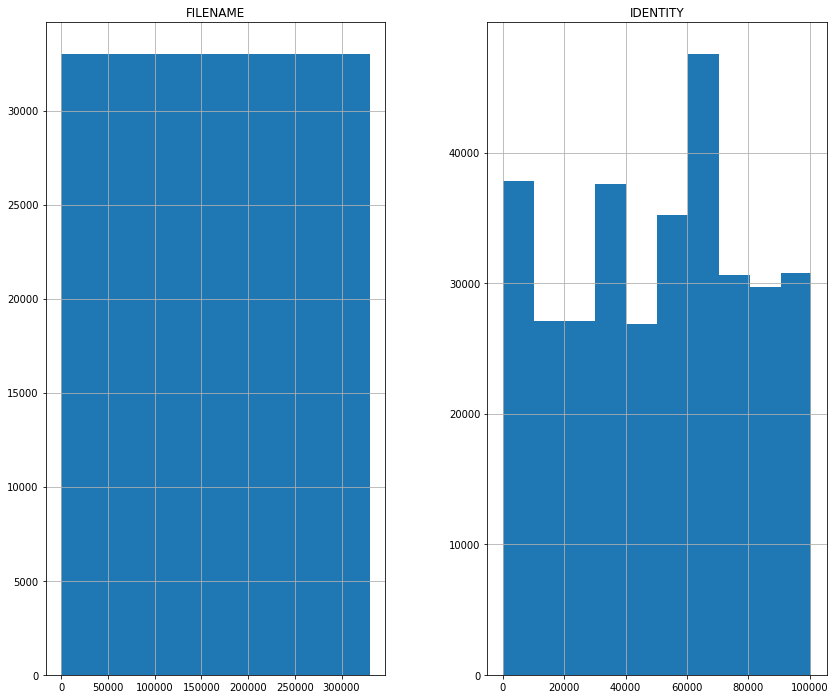

In [28]:
train.hist(figsize=(14,12))
plt.show()

In [29]:
train.corr()

,FILENAME,IDENTITY
FILENAME,1.000000,0.000385
IDENTITY,0.000385,1.000000


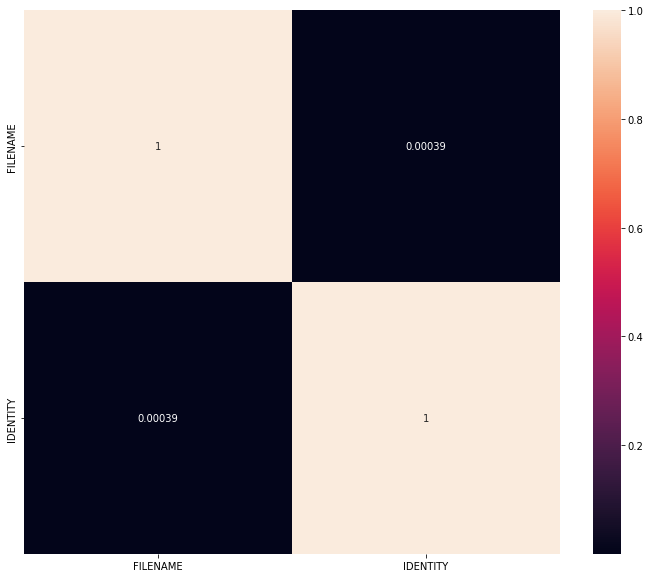

In [30]:
plt.figure(figsize = (12,10))

sns.heatmap(train.corr(), annot =True)

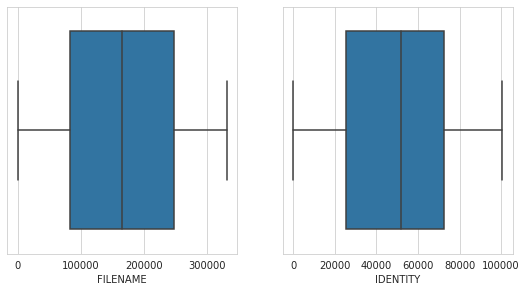

In [31]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='FILENAME',data=train)
plt.subplot(2,3,2)
sns.boxplot(x='IDENTITY',data=train)

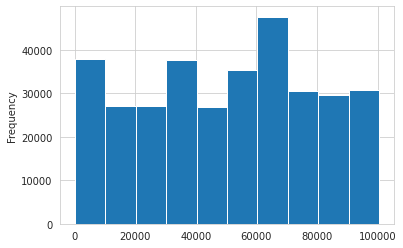

In [32]:
train['IDENTITY'].plot(kind='hist')

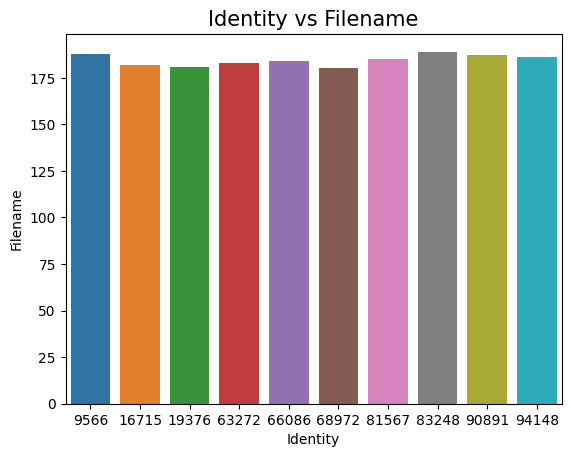

In [33]:
plt.style.use("default")
sns.barplot(x="IDENTITY", y="FILENAME",data=train[180:190])
plt.title("Identity vs Filename",fontsize=15)
plt.xlabel("Identity")
plt.ylabel("Filename")
plt.show()

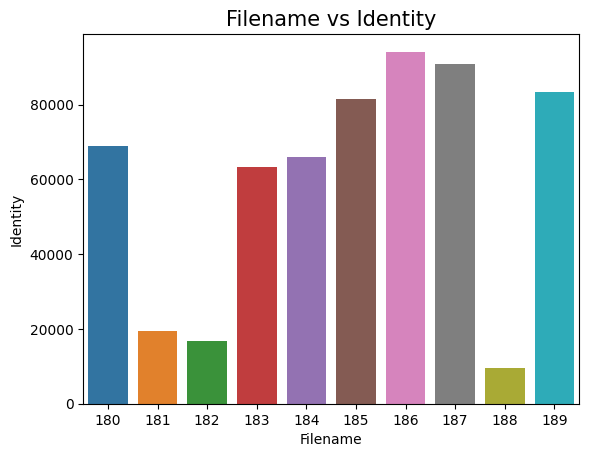

In [34]:
plt.style.use("default")
sns.barplot(x="FILENAME", y="IDENTITY",data=train[180:190])
plt.title("Filename vs Identity",fontsize=15)
plt.xlabel("Filename")
plt.ylabel("Identity")
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

231277
99119
231277
99119


In [37]:
from tensorflow import keras
from tensorflow.keras import layers
model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=80,activation='relu',name = 'input_layer'),
      tf.keras.layers.Dense(units=60,activation='relu',name = 'dense_layer1'),
      tf.keras.layers.Dense(units=40,activation='relu',name = 'dense_layer2'),
      tf.keras.layers.Dense(units=1,name='Output_layer')
],name='Model')   # Dropout and Batch Normalization can also be used.


        
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',        # In loss mae can also be used.
    metrics=['binary_accuracy'],
)


history = model.fit(X_train,y_train,batch_size=256,
    epochs=150,
)

Epoch 1/150
904/904 [==============================] - 3s 2ms/step - loss: 2549277.0000 - binary_accuracy: 0.0000e+00
Epoch 2/150
904/904 [==============================] - 2s 2ms/step - loss: 2549278.2500 - binary_accuracy: 0.0000e+00
Epoch 3/150
904/904 [==============================] - 2s 2ms/step - loss: 2549277.2500 - binary_accuracy: 0.0000e+00
Epoch 4/150
904/904 [==============================] - 2s 2ms/step - loss: 2549276.7500 - binary_accuracy: 0.0000e+00
Epoch 5/150
904/904 [==============================] - 2s 2ms/step - loss: 2549276.7500 - binary_accuracy: 0.0000e+00
Epoch 6/150
904/904 [==============================] - 2s 2ms/step - loss: 2549278.0000 - binary_accuracy: 0.0000e+00
Epoch 7/150
904/904 [==============================] - 2s 2ms/step - loss: 2549278.0000 - binary_accuracy: 0.0000e+00
Epoch 8/150
904/904 [==============================] - 2s 2ms/step - loss: 2549279.0000 - binary_accuracy: 0.0000e+00
Epoch 9/150
904/904 [==============================] - 2

In [38]:
y_pred = model.predict(X_test)
y_pred

array([[-1969.4983],
       [-1917.8948],
       [-8290.304 ],
       ...,
       [-9183.044 ],
       [-6835.4985],
       [-3124.0742]], dtype=float32)

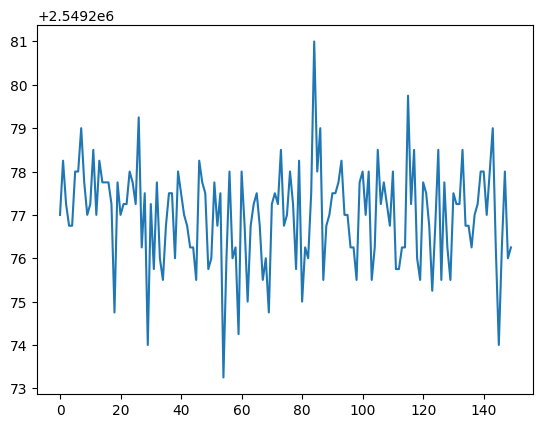

In [39]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

In [40]:
model.summary()

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 80)                160       
_________________________________________________________________
dense_layer1 (Dense)         (None, 60)                4860      
_________________________________________________________________
dense_layer2 (Dense)         (None, 40)                2440      
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 41        
Total params: 7,501
Trainable params: 7,501
Non-trainable params: 0
_________________________________________________________________


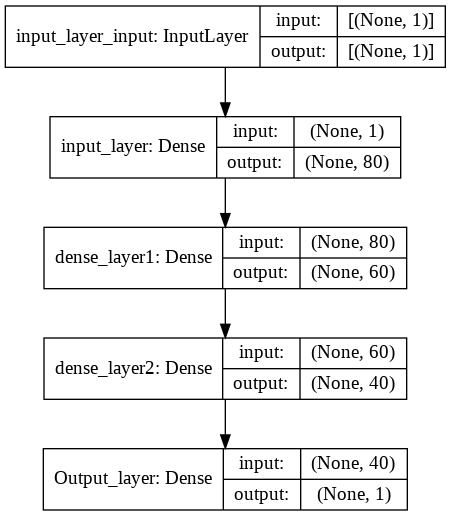

In [41]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

Best Validation Loss: 2549273.2500
Best Validation Accuracy: 0.0000


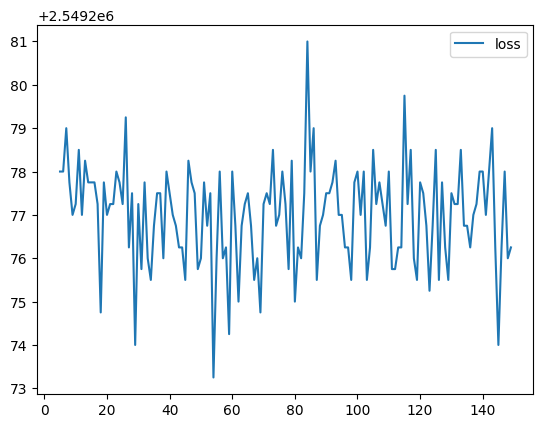

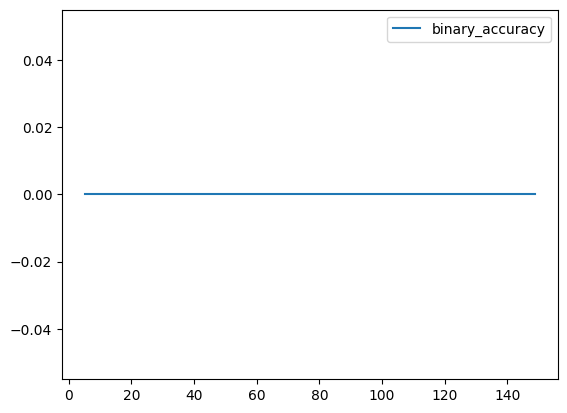

In [42]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss']].plot()
history_df.loc[5:, ['binary_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['loss'].min(), 
              history_df['binary_accuracy'].max()))

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [44]:
model.evaluate(X_test,y_test)

3098/3098 [==============================] - 4s 1ms/step - loss: 2545567.2500 - binary_accuracy: 1.0089e-05


[2545567.25, 1.0088882845593616e-05]